<a href="https://colab.research.google.com/github/Rawan-Sotohy/college-projects/blob/master/Supermarket_Sales_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Section 1: Notebook Setup

# 🛒 Supermarket Sales EDA — Business Insights & Visualization
### Kaggle Notebook Assignment | by * Rawan Sotohy *

## Objective
The goal of this notebook is to perform **Exploratory Data Analysis (EDA)** on the **Supermarket Sales Dataset** to uncover business insights related to customer behavior, product performance, and sales trends.  
We will analyze patterns, visualize distributions, and identify key metrics that can help improve supermarket business decisions.


## Dataset Description

The [Supermarket Sales dataset](https://www.kaggle.com/datasets/faresashraf1001/supermarket-sales) contains transactional records from three supermarket branches in different cities.
Each row represents one invoice, meaning a single customer purchase. It includes details such as the branch, city, customer type, gender, product line, unit price, quantity, taxes, total amount, date, time, payment method, gross income, and customer rating.
This dataset helps analyze customer behavior, sales performance, and business trends across different branches and product categories.

---


In [ ]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load Dataset
df = pd.read_csv("/kaggle/input/supermarket-sales/SuperMarket Analysis.csv")

In [ ]:
# Display first 10 rows
df.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,Giza,Naypyitaw,Member,Female,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,6:30:00 PM,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,Alex,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,2:36:00 PM,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,Giza,Naypyitaw,Member,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38:00 AM,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,Alex,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,5:15:00 PM,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,Cairo,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,1:27:00 PM,Credit card,164.52,4.761905,8.2260,5.9


In [ ]:
df.columns.tolist()

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Unit price',
 'Quantity',
 'Tax 5%',
 'Sales',
 'Date',
 'Time',
 'Payment',
 'cogs',
 'gross margin percentage',
 'gross income',
 'Rating']

---

## Section 2: Basic Exploratory Analysis

### Take big picture about dataset

In [ ]:
# Check shape of the dataset (rows, columns)
print("Dataset Shape:", df.shape)

Dataset Shape: (1000, 17)


In [ ]:
# Display data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
# Summary statistics for numerical features
df.describe()

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [ ]:
# Check for missing values
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [ ]:
# Check for duplicates
df.duplicated().sum()

0

### Basic visualizations

In [ ]:
# Unique values count for categorical columns
categorical_cols = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']
for col in categorical_cols:
    print(f"{col} unique values:\n{df[col].value_counts()}\n")


Branch unique values:
Branch
Alex     340
Cairo    332
Giza     328
Name: count, dtype: int64

City unique values:
City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

Customer type unique values:
Customer type
Member    565
Normal    435
Name: count, dtype: int64

Gender unique values:
Gender
Female    571
Male      429
Name: count, dtype: int64

Product line unique values:
Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

Payment unique values:
Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64



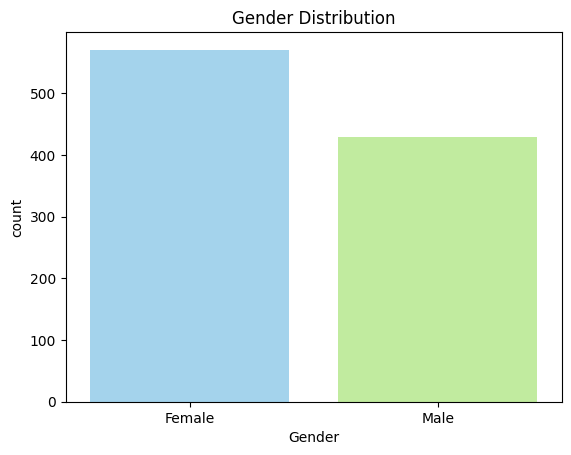

In [ ]:
# Gender distribution bar chart
sns.countplot(data=df, x='Gender', palette=["#98d6f8", "#bff793"])
plt.title('Gender Distribution')
plt.show()

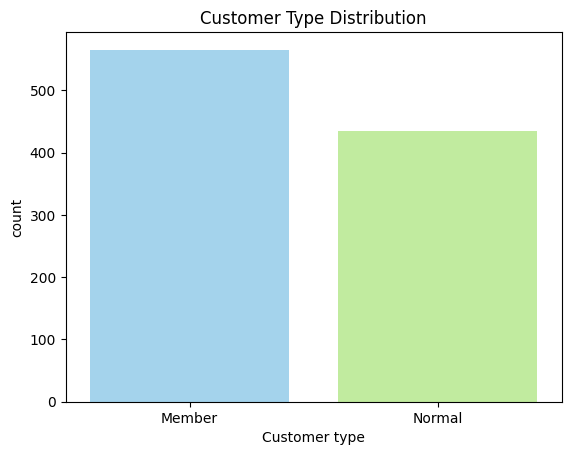

In [ ]:
# Customer type counts
sns.countplot(data=df, x='Customer type', palette=["#98d6f8", "#bff793", "#f9c29f"])
plt.title('Customer Type Distribution')
plt.show()

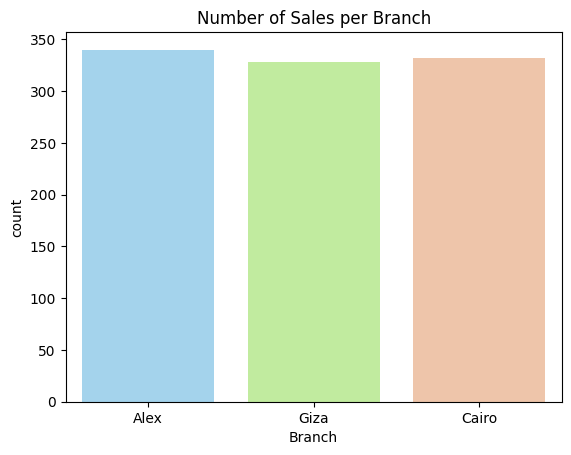

In [ ]:
# Sales per Branch
sns.countplot(data=df, x='Branch', palette=["#98d6f8", "#bff793", "#f9c29f"])
plt.title('Number of Sales per Branch')
plt.show()

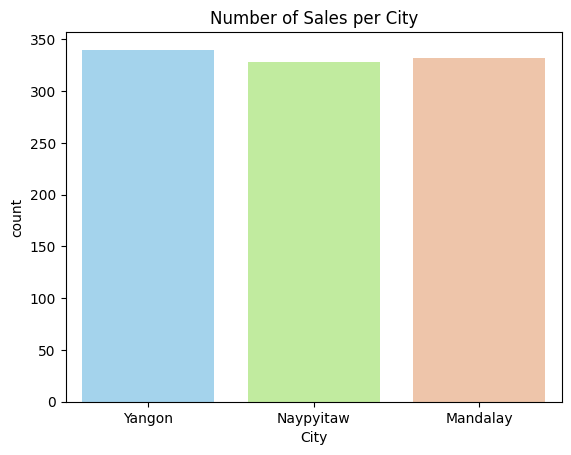

In [ ]:
# Sales per City
sns.countplot(data=df, x='City', palette=["#98d6f8", "#bff793", "#f9c29f"])
plt.title('Number of Sales per City')
plt.show()

- **Gender distribution:**

The chart shows that female customers slightly outnumber male customers.
This suggests that a significant portion of the supermarket’s customer base is female, which could be useful for targeted marketing strategies.

- **Customer type:**

The plot indicates that Members are slightly more common than Normal customers.
This highlights that many customers are enrolled in the membership program — a positive sign, as members often bring higher sales and stronger loyalty.

- **Sales per Branch/City:**

The bar charts show that:

Branch A has the highest number of transactions, followed by B and then C.

The same pattern is observed across cities since each branch is associated with a specific city.

This means that Branch A is the busiest in terms of customer volume, even if it might not have the highest total revenue (which is analyzed later in the Bivariate Analysis section).

---

## Section 3: Bivariate Analysis


We will answer:
- Which branch has the highest total sales?
- Which city has the most transactions?
- Which product category (product_line) has the highest revenue?
- Do members spend more than normal customers?

We will use `groupby` and visualizations to answer these questions.


In [ ]:
# Total sales per Branch
branch_sales = df.groupby('Branch')['Sales'].sum().sort_values(ascending=False)
branch_sales


Branch
Giza     110568.7065
Alex     106200.3705
Cairo    106197.6720
Name: Sales, dtype: float64

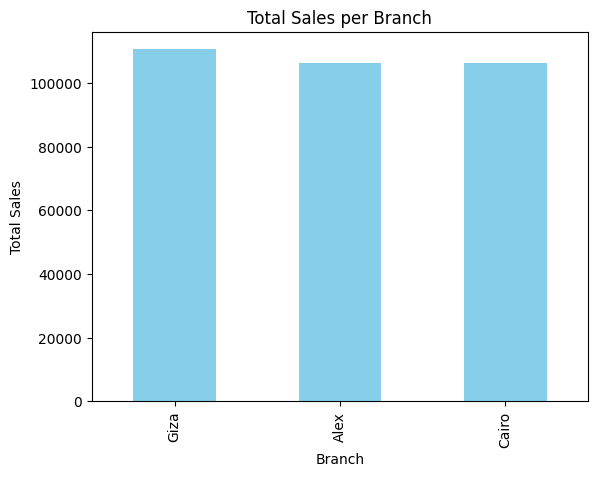

In [ ]:
# Visualization
branch_sales.plot(kind='bar', title='Total Sales per Branch', color='skyblue')
plt.ylabel('Total Sales')
plt.show()


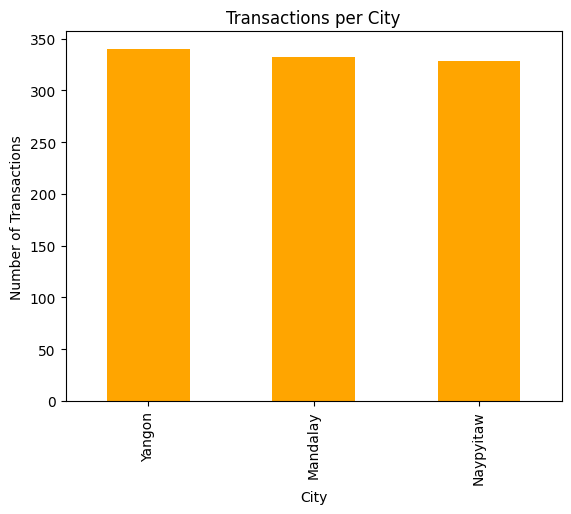

In [ ]:
# Transactions per City
city_transactions = df['City'].value_counts()
city_transactions.plot(kind='bar', title='Transactions per City', color='orange')
plt.ylabel('Number of Transactions')
plt.show()

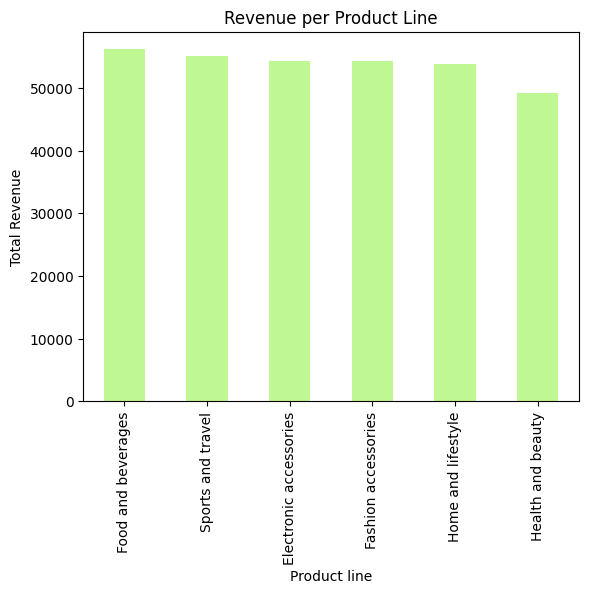

In [ ]:
# Revenue per Product Line
product_revenue = df.groupby('Product line')['Sales'].sum().sort_values(ascending=False)
product_revenue.plot(kind='bar', title='Revenue per Product Line', color='#bff793')
plt.ylabel('Total Revenue')
plt.show()

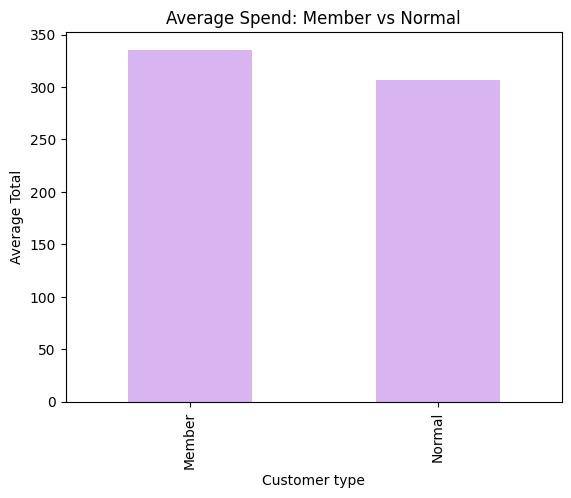

In [ ]:
# Average spend by Customer type
avg_spend = df.groupby('Customer type')['Sales'].mean()
avg_spend.plot(kind='bar', title='Average Spend: Member vs Normal', color='#d8b4f0')
plt.ylabel('Average Total')
plt.show()

1. Which branch has the highest total sales?

 Branch C has the highest total sales, even though it doesn’t have the highest number of transactions. This means customers at Branch C tend to spend more per transaction.

2. Which city has the most transactions?

 The city corresponding to Branch A has the largest number of transactions.
(Each branch is tied to a city, so Branch A’s city is the busiest location.)

3. Which product category (product_line) has the highest revenue?

 Food and beverages is the top product line in terms of total revenue, outperforming all other categories. This suggests it's the most profitable segment for the supermarket.

4. Do members spend more than normal customers?

 Yes
Members spend more than Normal customers on average, and their total revenue is higher. This indicates that the membership program is effective and contributes significantly to sales.

---

## Bonus Section: Dashboard KPIs

In [ ]:
import plotly.graph_objects as go

# KPI values
total_sales = df['Sales'].sum()
avg_basket = df['Sales'].mean()
transactions = df.shape[0]
avg_quantity = df['Quantity'].mean()
avg_rating = df['Rating'].mean()

# KPIs list
kpis = [
    ("Total Sales", total_sales, "$", ",.0f", "#2E86C1"),
    ("Avg Basket", avg_basket, "$", ",.2f", "#28B463"),
    ("Transactions", transactions, "", ",.0f", "#F39C12"),
    ("Avg Quantity", avg_quantity, "", ".2f", "#8E44AD"),
    ("Avg Rating", avg_rating, "", ".2f", "#E74C3C")
]

fig = go.Figure()
n = len(kpis)

for i, (title, value, prefix, fmt, color) in enumerate(kpis):
    x0 = i / n
    x1 = (i + 1) / n

    fig.add_trace(go.Indicator(
        mode="number",
        value=value,
        title={"text": f"<b>{title}</b>", "font": {"size": 14, "color": color}},
        number={"prefix": prefix, "valueformat": fmt, "font": {"size": 22}},
        domain={'x': [x0, x1], 'y': [0, 1]}
    ))

    fig.add_shape(
        type="rect",
        xref="paper",
        yref="paper",
        x0=x0, x1=x1, y0=0, y1=1,
        fillcolor=color,
        opacity=0.1,
        line_width=0,
        layer="below"
    )

fig.update_layout(
    title_text="🟡 Supermarket Sales — KPI Dashboard",
    title_x=0.5,
    height=300,
    margin=dict(t=60, b=0, l=0, r=0),
    paper_bgcolor="white"
)



fig.show()


### 🟡 Dashboard KPIs

* **Total Sales:** The total revenue generated from all transactions.
* **Average Basket Size:** The average amount spent per transaction.
* **Total Transactions:** The overall number of transactions recorded.
* **Average Quantity:** The average number of items purchased per transaction.
* **Average Rating:** The overall customer satisfaction score based on ratings.
---

## Section 4: Correlation & Relationships

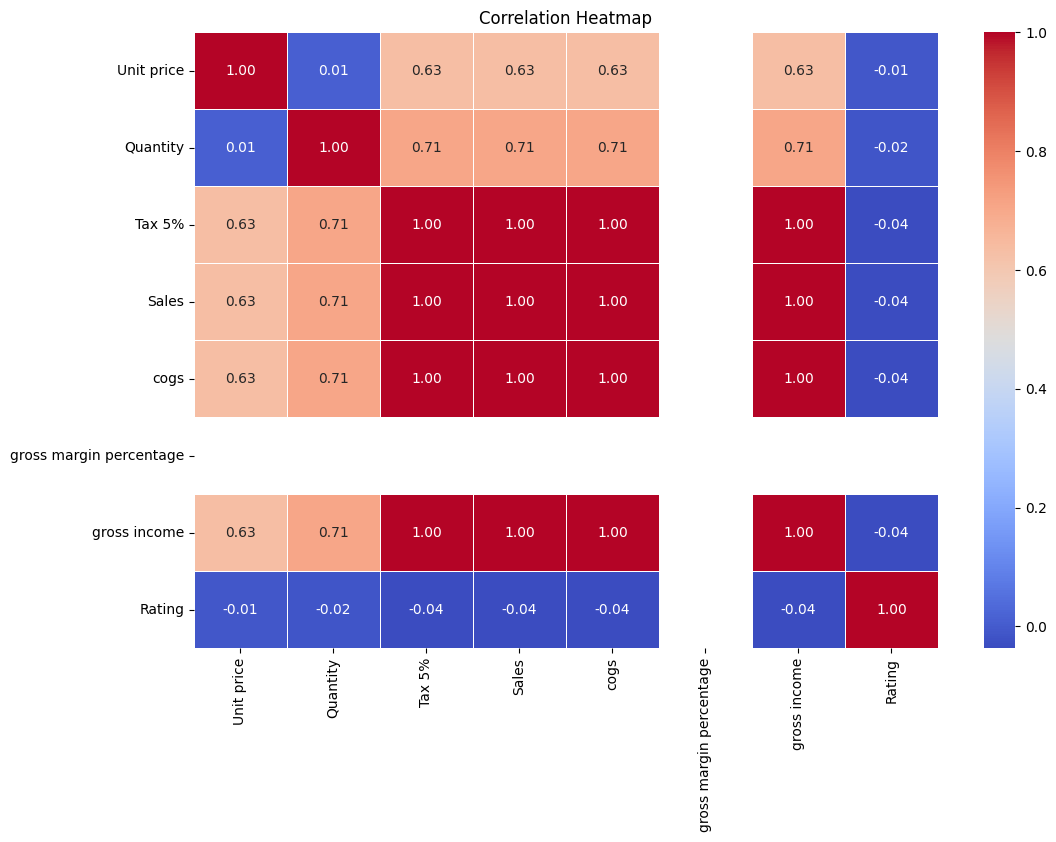

In [ ]:
# Correlation heatmap

numeric_cols = df.select_dtypes(include='number')

plt.figure(figsize=(12,8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

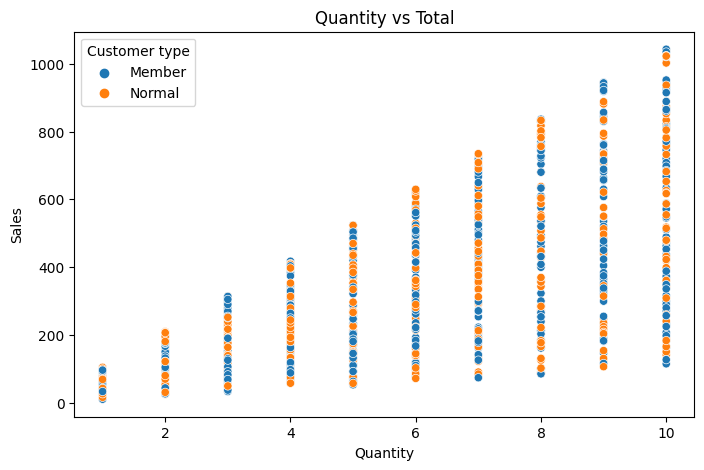

In [ ]:
# Scatter plot Quantity vs Total
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Quantity', y='Sales', hue='Customer type')
plt.title('Quantity vs Total')
plt.show()

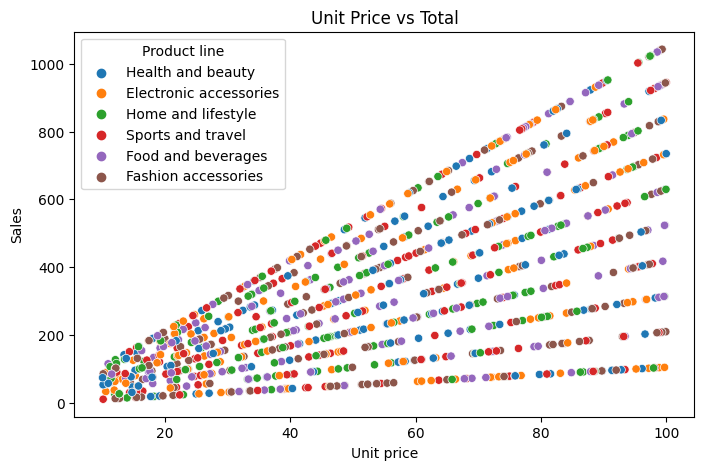

In [ ]:
# Analyze Unit Price vs Total
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Unit price', y='Sales', hue='Product line')
plt.title('Unit Price vs Total')
plt.show()

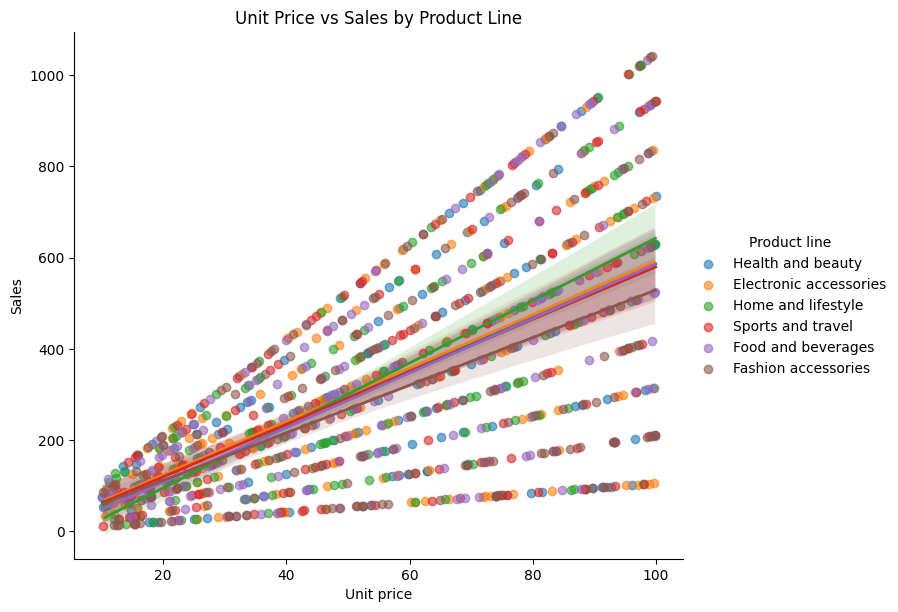

In [ ]:
# Plot regression per Product line
sns.lmplot(
    data=df,
    x='Unit price',
    y='Sales',
    hue='Product line',
    height=6,
    aspect=1.2,
    scatter_kws={'alpha':0.6},
    line_kws={'linewidth':2}
)
plt.title('Unit Price vs Sales by Product Line')
plt.show()



### **Correlation Heatmap**

* There’s a **very strong positive correlation** between `Sales` and `cogs`, which is expected.
* `Sales` is also **positively correlated** with both `Unit price` and `Quantity`.
* `Rating` shows **very weak correlations** with all other variables, meaning customer ratings don’t depend much on price or quantity.

---

### **Quantity vs Total**

The scatterplot shows a **clear upward trend** — as **Quantity increases**, **Sales** also increases.
Most transactions involve small quantities, but some outliers show very high quantities and totals.

---

### **Unit Price vs Total**

There’s a **positive but more scattered relationship** between **Unit Price** and **Sales**.
Higher prices often lead to higher totals, but the total amount also depends on quantity, which explains the spread in the plot.


---

## Section 5: Insights & Conclusion

## **5. Insights & Conclusion**

Based on the analysis, here are the **key business insights**:

1. **Branch C** has the **highest total sales**, even though **Branch A** has the most transactions. This means customers in Branch C tend to spend more per purchase.
2. **The city of Branch A** is the busiest in terms of transaction volume, indicating high customer traffic.
3. **Food and beverages** is the **top product line** in terms of revenue, making it a key category for the business.
4. **Members spend more than Normal customers** on average, showing the effectiveness of the membership program.
5. There’s a **strong relationship between Quantity, Unit Price, and Total** — both factors drive revenue, and larger baskets lead to higher totals.

---

**Conclusion:**

The supermarket’s revenue is mainly driven by high-value customers (especially members) and certain branches/product lines. Focusing on **Branch C**, **Food and beverages**, and **loyalty programs** can help boost sales even further. Branch A’s high traffic also presents opportunities for targeted promotions.

---